In [2]:
import pyforest
from sklearn.linear_model import LogisticRegression
import math

In [ ]:
# Loading dataset

In [6]:
bank=pd.read_csv("C:/Users/NAMRATA/Downloads/DATA SCIENCE/ASSIGNMENT/logistic regression/bank-full.csv",delimiter=';')
bank

<IPython.core.display.Javascript object>

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# There are no Nan values

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# x=input variable and y=output variable
x=bank.iloc[:,:16]
y=bank.iloc[:,16]

In [ ]:
#converting output variable:yes=1 and no=0

In [9]:
y_bank=y.eq('yes').mul(1)
y_bank

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [ ]:
#getting numerical values for categorical data

In [10]:
x_bank=pd.get_dummies(x)
x_bank

<IPython.core.display.Javascript object>

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# applying logistic model

In [11]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [12]:
classifier=LogisticRegression(max_iter=2000)
classifier.fit(x_bank,y_bank)

LogisticRegression(max_iter=2000)

In [ ]:
# Predicting for input variables

In [13]:
y_pred=classifier.predict(x_bank)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [14]:
y_pred_df=pd.DataFrame({'actual':y_bank,'predicted_values':classifier.predict(x_bank)})

<IPython.core.display.Javascript object>

In [ ]:
#Actual values vs predict values

In [15]:
y_pred_df

,actual,predicted_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [ ]:
# Probabilities for predict  values

In [17]:
y_pred_prob=classifier.predict_proba(x_bank)
y_pred_prob

array([[0.98342243, 0.01657757],
       [0.98850346, 0.01149654],
       [0.99722269, 0.00277731],
       ...,
       [0.01152314, 0.98847686],
       [0.87653597, 0.12346403],
       [0.81001366, 0.18998634]])

In [28]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_bank,y_pred)
print (confusion_matrix)

[[38919  1003]
 [ 3471  1818]]


In [29]:
#Accuracy
(38919+1818)/(38919+1003+3471+1818)*100

90.10417818672447

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_bank,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     39922
           1       0.64      0.34      0.45      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



In [ ]:
#ROC curve

Text(0, 0.5, 'True Positive Rate')

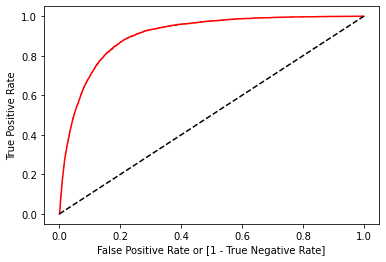

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_bank, classifier.predict_proba(x_bank)[:,1])

auc = roc_auc_score(y_bank, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [32]:
# AUC VALUES
auc

0.6593041413740345

In [ ]:
'''
As the auc is 0.66 we can say the model is good ,There will be type 1 errors and type 2 errors.It will give correct results with approx 90% accuracy using these variables.
'''